### Scrape the data from Flipkart website and perform EDA: 
- Using beautifulsoup scrape the Flipkart smartphones page
- Store the data in a pandas dataframe
- Extract features of smartphones in separate columns
- Take care of data types, convert numerical data types to int or float
- Handle duplicate and missing values
- Perform end to end EDA and mention the observations in markdown cells

Page link:  https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [41]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax'
page = requests.get(URL)
page.status_code

200

In [42]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [43]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [44]:
name = soup.find('div', class_ = '_4rR01T')
name.text

'vivo T2 5G (Nitro Blaze, 128 GB)'

In [45]:
rating = soup.find('span', class_ = '_1lRcqv')
rating.text

'4.4'

In [46]:
review_and_rating = soup.find('span', class_ = '_2_R_DZ')
review_and_rating.text

'2,967 Ratings\xa0&\xa0199 Reviews'

In [47]:
specifications = soup.find('div', class_ = 'fMghEO')
features = specifications.findAll('li',class_ = 'rgWa7D')

In [48]:
price = soup.find('div',class_ = '_30jeq3 _1_WHN1')
price.text

'₹20,999'

In [49]:
product_details = soup.findAll('div', class_ = '_3pLy-c row')

In [51]:
# extracting all components from product details [0-23]
Name = []
Rating = []
Reviews_n_rating = []
Specifications = []
Features = []
Price = []



for product in product_details:
    name = product.find('div', class_ = '_4rR01T')
    if name is None:
        Name.append(np.nan)
    else:
        Name.append(name.text)
        
    rating = product.find('span', class_ = '_1lRcqv')
    if rating is None:
        Rating.append(np.nan)
    else:
        Rating.append(rating.text)
        
    reviews_n_rating = product.find('span', class_ = '_2_R_DZ')
    if reviews_n_rating is None:
        Reviews_n_rating.append(np.nan)
    else:
        Reviews_n_rating.append(reviews_n_rating.text)
        
    
    specifications = product.find('div', class_ = 'fMghEO')
    features = specifications.findAll('li',class_ = 'rgWa7D')
    temp= []
    for f in features:
        temp.append(f.text)
    Features.append(temp)
        
    price = product.find('div',class_ = '_30jeq3 _1_WHN1')
    if price is None:
        Price.append(np.nan)
    else:
        Price.append(price.text)


In [52]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page=1'

In [53]:
Name = []
Rating = []
Reviews_n_rating = []
Specifications = []
Features = []
Price = []


for i in range (1,21):
    url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page={}'.format(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.content)
    
    product_details = soup.findAll('div', class_ = '_3pLy-c row')

    for product in product_details:
        name = product.find('div', class_ = '_4rR01T')
        if name is None:
            Name.append(np.nan)
        else:
            Name.append(name.text)

        rating = product.find('span', class_ = '_1lRcqv')
        if rating is None:
            Rating.append(np.nan)
        else:
            Rating.append(rating.text)

        reviews_n_rating = product.find('span', class_ = '_2_R_DZ')
        if reviews_n_rating is None:
            Reviews_n_rating.append(np.nan)
        else:
            Reviews_n_rating.append(reviews_n_rating.text)


        specifications = product.find('div', class_ = 'fMghEO')
        features = specifications.findAll('li',class_ = 'rgWa7D')
        temp= []
        for f in features:
            temp.append(f.text)
        Features.append(temp)

        price = product.find('div',class_ = '_30jeq3 _1_WHN1')
        if price is None:
            Price.append(np.nan)
        else:
            Price.append(price.text)


In [54]:
print(len(Name))
print(len(Rating))
print(len(Reviews_n_rating))
print(len(Features))
print(len(Price))

480
480
480
480
480


In [55]:
data = {'Product_name':Name,'Rating':Rating, 'No_of_reviews_n_rating':Reviews_n_rating, 'Features':Features, 'Price':Price} 

df = pd.DataFrame(data)

In [56]:
df.head()

,Product_name,Rating,No_of_reviews_n_rating,Features,Price
0,"vivo T2 5G (Nitro Blaze, 128 GB)",4.4,"2,967 Ratings & 199 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...","₹20,999"
1,"vivo T2 5G (Velocity Wave, 128 GB)",4.4,"2,967 Ratings & 199 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...","₹20,999"
2,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,"33,743 Ratings & 1,317 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...","₹70,999"
3,"POCO X5 Pro 5G (Astral Black, 256 GB)",4.3,"6,534 Ratings & 688 Reviews","[8 GB RAM | 256 GB ROM, 16.94 cm (6.67 inch) F...","₹24,999"
4,"POCO X5 5G (Jaguar Black, 256 GB)",4.1,"1,932 Ratings & 139 Reviews","[8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...","₹20,999"


In [57]:
print(df['Rating'].dtype)
print(df['Price'].dtype)

object
object


In [58]:
df['Rating'] = df['Rating'].astype(float)
df['Rating'].dtype

dtype('float64')

In [59]:
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',','').astype(float)

In [60]:
df.head()

,Product_name,Rating,No_of_reviews_n_rating,Features,Price
0,"vivo T2 5G (Nitro Blaze, 128 GB)",4.4,"2,967 Ratings & 199 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",20999.0
1,"vivo T2 5G (Velocity Wave, 128 GB)",4.4,"2,967 Ratings & 199 Reviews","[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",20999.0
2,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,"33,743 Ratings & 1,317 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",70999.0
3,"POCO X5 Pro 5G (Astral Black, 256 GB)",4.3,"6,534 Ratings & 688 Reviews","[8 GB RAM | 256 GB ROM, 16.94 cm (6.67 inch) F...",24999.0
4,"POCO X5 5G (Jaguar Black, 256 GB)",4.1,"1,932 Ratings & 139 Reviews","[8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",20999.0


In [61]:
def get_rating(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'([\d,\s]+)Ratings')
        result = ''.join(rating_regex.findall(text)).strip()
        result = int(result.replace(',',''))
        return result
        
def get_review(text):
    if text is np.nan:
        return 0
    else:
        review_regex = re.compile(r'([\d\s]+)Reviews')
        result = ''.join(review_regex.findall(text)).strip()
        result = int(result.replace(',',''))
        return result

    

In [62]:
df['No_of_ratings'] = df['No_of_reviews_n_rating'].apply(get_rating)
df['No_of_reviews'] = df['No_of_reviews_n_rating'].apply(get_review)

In [63]:
df.drop('No_of_reviews_n_rating', axis = 1, inplace = True)

In [64]:
df.head()

,Product_name,Rating,Features,Price,No_of_ratings,No_of_reviews
0,"vivo T2 5G (Nitro Blaze, 128 GB)",4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",20999.0,2967,199
1,"vivo T2 5G (Velocity Wave, 128 GB)",4.4,"[8 GB RAM | 128 GB ROM, 16.21 cm (6.38 inch) F...",20999.0,2967,199
2,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",70999.0,33743,317
3,"POCO X5 Pro 5G (Astral Black, 256 GB)",4.3,"[8 GB RAM | 256 GB ROM, 16.94 cm (6.67 inch) F...",24999.0,6534,688
4,"POCO X5 5G (Jaguar Black, 256 GB)",4.1,"[8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",20999.0,1932,139


In [65]:
def get_product(text):
    if text is np.nan:
        result = 'Not Available'
        return result
    else:
        brand_regex = re.compile(r'^\w+')
        result = ''.join(brand_regex.findall(text))
        return result


In [66]:
df['Brand_name'] = df['Product_name'].apply(get_product)

In [67]:
df.Features = df.Features.apply(lambda x : ', '.join(x))

In [68]:
def get_RAM(text):
    regex_RAM = re.compile(r'([A-Z0-9\s]+)GB RAM')
    result = regex_RAM.findall(text)
    if len(result) ==0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result


def get_ROM(text):
    regex_ROM = re.compile(r'([A-Z0-9\s]+)GB ROM')
    result = regex_ROM.findall(text)
    if len(result) ==0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result
    
def get_display_size(text):
    regex_display_size = re.compile(r'([0-9.\s]+)inch')
    result = regex_display_size.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result

def get_camera(text):
    regex_camera = re.compile(r'([0-9.]+)MP')
    result= regex_camera.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result

def get_warranty(text):
    regex_warranty = re.compile(r'([\d\s]+)Year')
    result= regex_warranty.findall(text)
    if len(result)==0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result

def get_processor(text):
    regex_processor = re.compile(r'([A-Za-z0-9\s]+)Processor')
    result = regex_processor.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result
    
def get_battery(text):
    regex_battery = re.compile(r'([0-9\s]+)mAh')
    result = regex_battery.findall(text)
    if len(result)==0:
        return np.nan
    else:
        result = ''.join(result).strip()
        return result
    

In [69]:
print('RAM : ',get_RAM(df['Features'][3]))
print('ROM :',get_ROM(df['Features'][3]))
print('Display size :',get_display_size(df['Features'][3]))
print('Camera : ', get_camera(df['Features'][3]))
print('Warranty :',get_warranty(df['Features'][3]))
print('Processor : ',get_processor(df['Features'][3]))
print('Battery : ',get_battery(df['Features'][3]))

RAM :  8
ROM : 256
Display size : 6.67
Camera :  ['108', '8', '2', '16']
Warranty : 1
Processor :  Qualcomm Snapdragon 778G
Battery :  5000


In [73]:
df['RAM (GB)'] = df['Features'].apply(get_RAM)
df['ROM (GB)'] = df['Features'].apply(get_ROM)
df['Display (inch)'] = df['Features'].apply(get_display_size)
df['Camera (MP)'] = df['Features'].apply(get_camera)
df['Warranty (Years)'] = df['Features'].apply(get_warranty)
df['Processor'] = df['Features'].apply(get_processor)
df['Battery (mAh)'] = df['Features'].apply(get_battery)

df.drop(['Features'], axis = 1, inplace = True)

df.head()

,Product_name,Rating,Price,No_of_ratings,No_of_reviews,Brand_name,RAM (GB),ROM (GB),Display (inch),Camera (MP),Warranty (Years),Processor,Battery (mAh)
0,"vivo T2 5G (Nitro Blaze, 128 GB)",4.4,20999.0,2967,199,vivo,8,128,6.38,"[2, 16]",1,Snapdragon 695,4500
1,"vivo T2 5G (Velocity Wave, 128 GB)",4.4,20999.0,2967,199,vivo,8,128,6.38,"[2, 16]",1,Snapdragon 695,4500
2,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,70999.0,33743,317,APPLE,NaN,128,6.1,"[12, 12, 12]",1,6 Core Processor,NaN
3,"POCO X5 Pro 5G (Astral Black, 256 GB)",4.3,24999.0,6534,688,POCO,8,256,6.67,"[108, 8, 2, 16]",1,Qualcomm Snapdragon 778G,5000
4,"POCO X5 5G (Jaguar Black, 256 GB)",4.1,20999.0,1932,139,POCO,8,256,6.67,"[48, 8, 2, 13]",1,Qualcomm Snapdragon 695,5000


In [75]:
def get_front_camera(lst):
    if len(lst)==0 or len(lst)==1:
        return np.nan
    else:
        result = ''.join(lst[-1]).strip()
        return result

def get_rear_camera(lst):
    if len(lst)==0:
        return np.nan
    else:
        if len(lst)==1:
            result = lst[-1]
            return result
        else:
            result = lst[0:-1]
            result = sum(list(map(float,result)))
            return result

In [76]:
df['Front Camera (MP)'] = df['Camera (MP)'].apply(get_front_camera)
df['Total Rear Camera (MP)'] = df['Camera (MP)'].apply(get_rear_camera)

In [77]:
df.drop('Camera (MP)', axis = 1, inplace = True)
df.head()

,Product_name,Rating,Price,No_of_ratings,No_of_reviews,Brand_name,RAM (GB),ROM (GB),Display (inch),Warranty (Years),Processor,Battery (mAh),Front Camera (MP),Total Rear Camera (MP)
0,"vivo T2 5G (Nitro Blaze, 128 GB)",4.4,20999.0,2967,199,vivo,8,128,6.38,1,Snapdragon 695,4500,16,2.0
1,"vivo T2 5G (Velocity Wave, 128 GB)",4.4,20999.0,2967,199,vivo,8,128,6.38,1,Snapdragon 695,4500,16,2.0
2,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,70999.0,33743,317,APPLE,NaN,128,6.1,1,6 Core Processor,NaN,12,24.0
3,"POCO X5 Pro 5G (Astral Black, 256 GB)",4.3,24999.0,6534,688,POCO,8,256,6.67,1,Qualcomm Snapdragon 778G,5000,16,118.0
4,"POCO X5 5G (Jaguar Black, 256 GB)",4.1,20999.0,1932,139,POCO,8,256,6.67,1,Qualcomm Snapdragon 695,5000,13,58.0


In [80]:
flipkart_phones = df[['Brand_name', 'Product_name','Processor', 'RAM (GB)', 'ROM (GB)', 'Battery (mAh)', 'Display (inch)', 'Front Camera (MP)', 'Total Rear Camera (MP)', 'No_of_reviews', 'No_of_ratings','Warranty (Years)','Rating','Price']]

In [1]:
flipkart_phones.to_csv('Flipkart Smartphones Data.csv', index = False)

NameError: name 'flipkart_phones' is not defined

In [3]:
flipkart_phones = pd.read_csv('Flipkart Smartphones Data.csv')

In [4]:
flipkart_phones.head()

,Brand_name,Product_name,Processor,RAM (GB),ROM (GB),Battery (mAh),Display (inch),Front Camera (MP),Total Rear Camera (MP),No_of_reviews,No_of_ratings,Warranty (Years),Rating,Price
0,vivo,"vivo T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8.0,128.0,4500.0,6.38,16.0,2.0,199,2967,1.0,4.4,20999.0
1,vivo,"vivo T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8.0,128.0,4500.0,6.38,16.0,2.0,199,2967,1.0,4.4,20999.0
2,APPLE,"APPLE iPhone 14 (Midnight, 128 GB)",6 Core Processor,NaN,128.0,NaN,6.10,12.0,24.0,317,33743,1.0,4.6,70999.0
3,POCO,"POCO X5 Pro 5G (Astral Black, 256 GB)",Qualcomm Snapdragon 778G,8.0,256.0,5000.0,6.67,16.0,118.0,688,6534,1.0,4.3,24999.0
4,POCO,"POCO X5 5G (Jaguar Black, 256 GB)",Qualcomm Snapdragon 695,8.0,256.0,5000.0,6.67,13.0,58.0,139,1932,1.0,4.1,20999.0


In [96]:
flipkart_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand_name              480 non-null    object 
 1   Product_name            480 non-null    object 
 2   Processor               385 non-null    object 
 3   RAM (GB)                399 non-null    object 
 4   ROM (GB)                478 non-null    object 
 5   Battery (mAh)           399 non-null    object 
 6   Display (inch)          476 non-null    object 
 7   Front Camera (MP)       391 non-null    object 
 8   Total Rear Camera (MP)  480 non-null    object 
 9   No_of_reviews           480 non-null    int64  
 10  No_of_ratings           480 non-null    int64  
 11  Warranty (Years)        408 non-null    object 
 12  Rating                  480 non-null    float64
 13  Price                   476 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory

In [104]:
flipkart_phones['Processor'].replace(np.nan,'Not Available', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand_name              480 non-null    object 
 1   Product_name            480 non-null    object 
 2   Processor               480 non-null    object 
 3   RAM (GB)                399 non-null    object 
 4   ROM (GB)                478 non-null    object 
 5   Battery (mAh)           399 non-null    object 
 6   Display (inch)          476 non-null    object 
 7   Front Camera (MP)       391 non-null    object 
 8   Total Rear Camera (MP)  480 non-null    object 
 9   No_of_reviews           480 non-null    int64  
 10  No_of_ratings           480 non-null    int64  
 11  Warranty (Years)        408 non-null    object 
 12  Rating                  480 non-null    float64
 13  Price                   476 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory

C:\Users\Jaseem Shaikh\AppData\Local\Temp\ipykernel_8968\3240251810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_phones['Processor'].replace(np.nan,'Not Available', inplace = True)


In [105]:
flipkart_phones['RAM (GB)'].replace(np.nan,'0', inplace = True)

C:\Users\Jaseem Shaikh\AppData\Local\Temp\ipykernel_8968\137406048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_phones['RAM (GB)'].replace(np.nan,'0', inplace = True)


In [110]:
flipkart_phones['RAM (GB)'] = flipkart_phones['RAM (GB)'].astype(int)

In [146]:
flipkart_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand_name              480 non-null    object 
 1   Product_name            480 non-null    object 
 2   Processor               480 non-null    object 
 3   RAM (GB)                480 non-null    int32  
 4   ROM (GB)                480 non-null    Int64  
 5   Battery (mAh)           480 non-null    int32  
 6   Display (inch)          480 non-null    float64
 7   Front Camera (MP)       391 non-null    object 
 8   Total Rear Camera (MP)  480 non-null    object 
 9   No_of_reviews           480 non-null    int64  
 10  No_of_ratings           480 non-null    int64  
 11  Rating                  480 non-null    float64
 12  Price                   480 non-null    float64
dtypes: Int64(1), float64(3), int32(2), int64(2), object(5)
memory usage: 45.6+ KB


In [126]:
flipkart_phones.loc[337,'ROM (GB)'] = '1000'
flipkart_phones.loc[336,'ROM (GB)'] = '1000'
flipkart_phones.loc[366,'ROM (GB)'] = '1000'
flipkart_phones['ROM (GB)'] = pd.to_numeric(flipkart_phones['ROM (GB)'], errors = 'coerce').astype('Int64')

In [120]:
flipkart_phones['Battery (mAh)'].replace(np.nan,'0', inplace = True)

In [121]:
flipkart_phones['Battery (mAh)'] = flipkart_phones['Battery (mAh)'].astype(int)

In [129]:
flipkart_phones['Display (inch)'] = flipkart_phones['Display (inch)'].astype(float)

In [134]:
l = [18,19,310, 385]

for i in l:
    flipkart_phones.loc[i,'Display (inch)'] = 6.78

In [141]:
flipkart_phones.drop('Warranty (Years)', axis = 1, inplace = True)

In [148]:
d = {'159':18975.0 ,'279': 24990.0 , '457': 21989.0 , '467': 19490.0}

for key in d:
    flipkart_phones.loc[int(key),'Price'] = d[key]

In [151]:
flipkart_phones['Front Camera (MP)'].replace(np.nan, '0', inplace = True)

In [153]:
flipkart_phones['Front Camera (MP)'] = flipkart_phones['Front Camera (MP)'].astype(float)

In [180]:
flipkart_phones['Total Rear Camera (MP)'] = flipkart_phones['Front Camera (MP)'].astype(float)

In [154]:
flipkart_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand_name              480 non-null    object 
 1   Product_name            480 non-null    object 
 2   Processor               480 non-null    object 
 3   RAM (GB)                480 non-null    int32  
 4   ROM (GB)                480 non-null    Int64  
 5   Battery (mAh)           480 non-null    int32  
 6   Display (inch)          480 non-null    float64
 7   Front Camera (MP)       480 non-null    float64
 8   Total Rear Camera (MP)  480 non-null    object 
 9   No_of_reviews           480 non-null    int64  
 10  No_of_ratings           480 non-null    int64  
 11  Rating                  480 non-null    float64
 12  Price                   480 non-null    float64
dtypes: Int64(1), float64(4), int32(2), int64(2), object(4)
memory usage: 45.6+ KB


In [156]:
flipkart_phones.head()

,Brand_name,Product_name,Processor,RAM (GB),ROM (GB),Battery (mAh),Display (inch),Front Camera (MP),Total Rear Camera (MP),No_of_reviews,No_of_ratings,Rating,Price
0,vivo,"vivo T2 5G (Nitro Blaze, 128 GB)",Snapdragon 695,8,128,4500,6.38,16.0,2.0,199,2967,4.4,20999.0
1,vivo,"vivo T2 5G (Velocity Wave, 128 GB)",Snapdragon 695,8,128,4500,6.38,16.0,2.0,199,2967,4.4,20999.0
2,APPLE,"APPLE iPhone 14 (Midnight, 128 GB)",6 Core Processor,0,128,0,6.10,12.0,24.0,317,33743,4.6,70999.0
3,POCO,"POCO X5 Pro 5G (Astral Black, 256 GB)",Qualcomm Snapdragon 778G,8,256,5000,6.67,16.0,118.0,688,6534,4.3,24999.0
4,POCO,"POCO X5 5G (Jaguar Black, 256 GB)",Qualcomm Snapdragon 695,8,256,5000,6.67,13.0,58.0,139,1932,4.1,20999.0


C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAM (GB)', ylabel='Brand_name'>

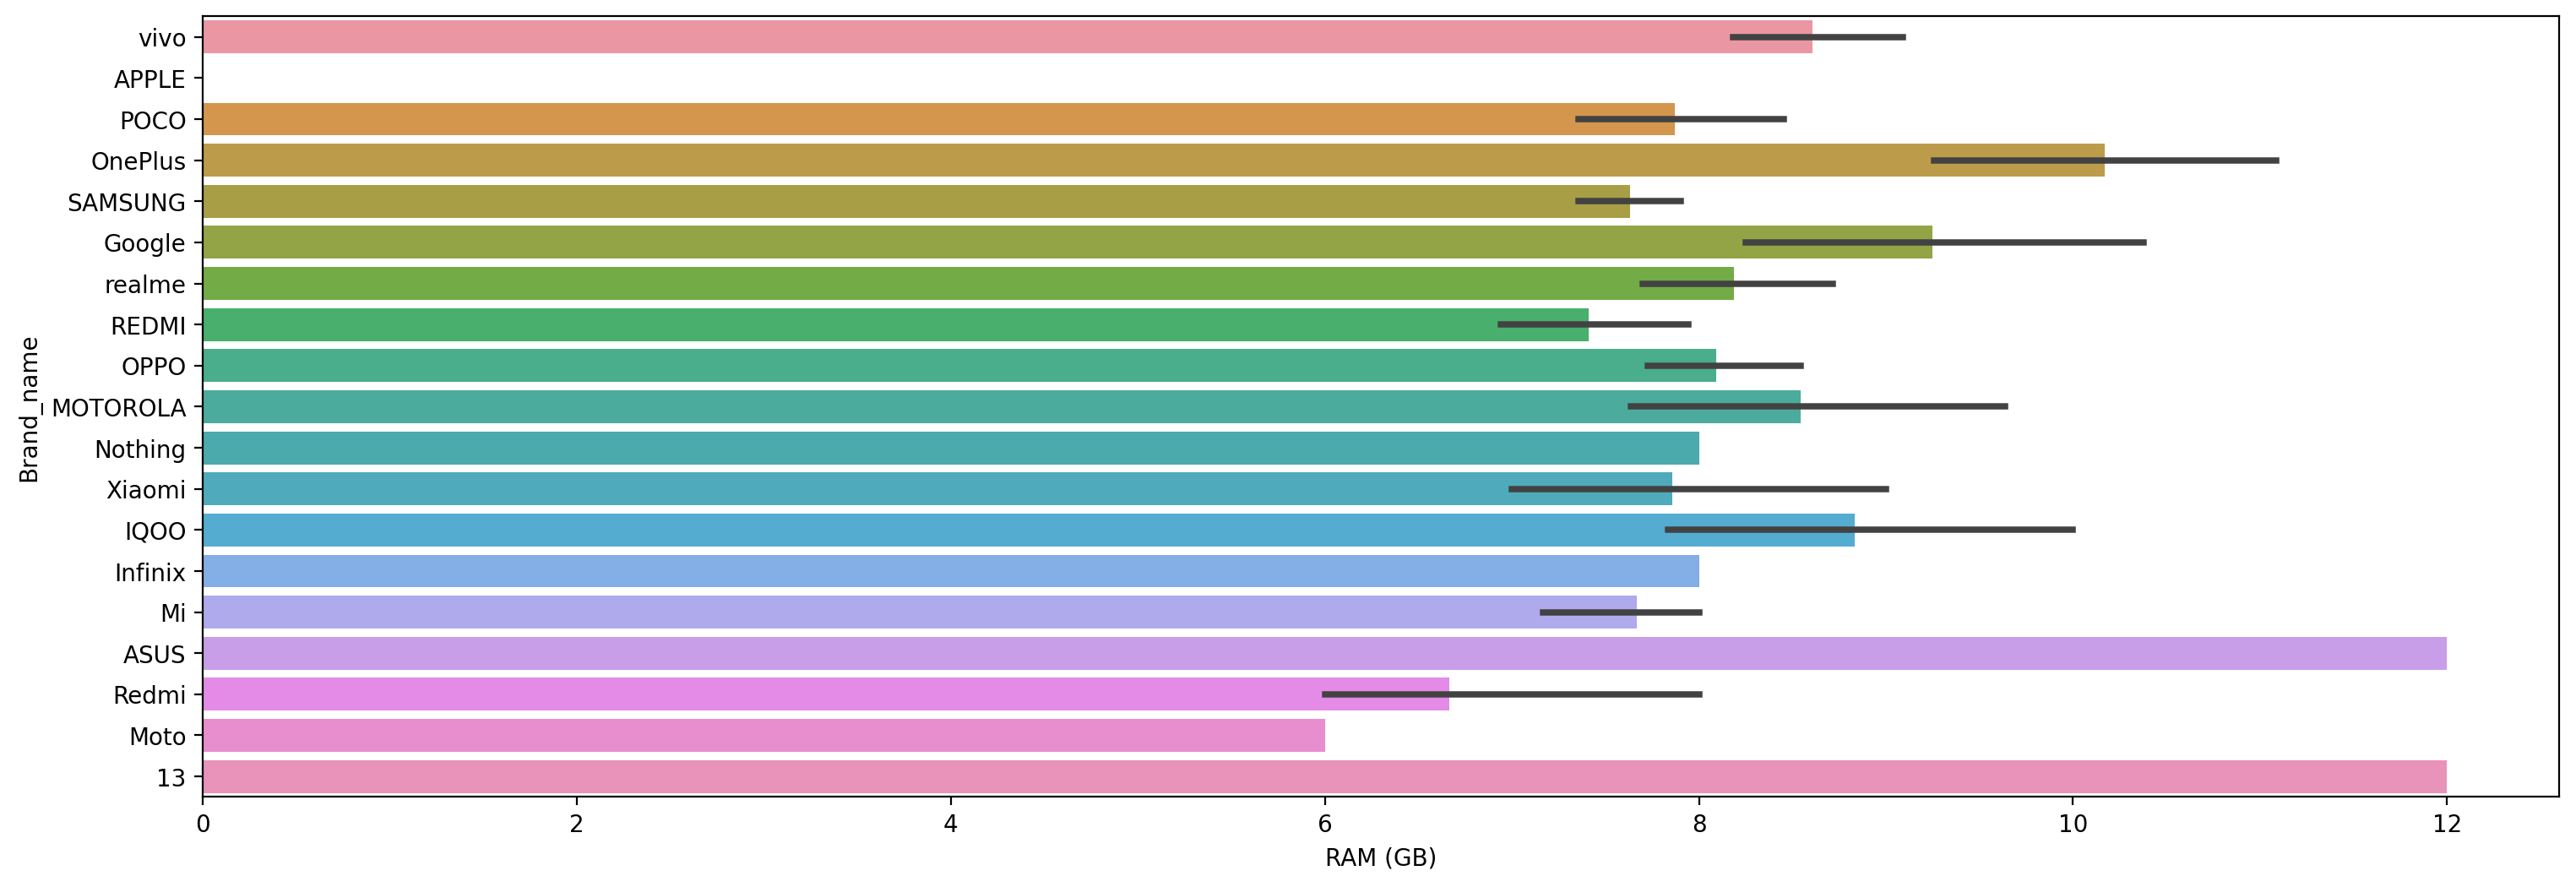

In [171]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('RAM (GB)','Brand_name', data = flipkart_phones)

#### 13 and Asus is the brand having higher RAM size.

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROM (GB)', ylabel='Brand_name'>

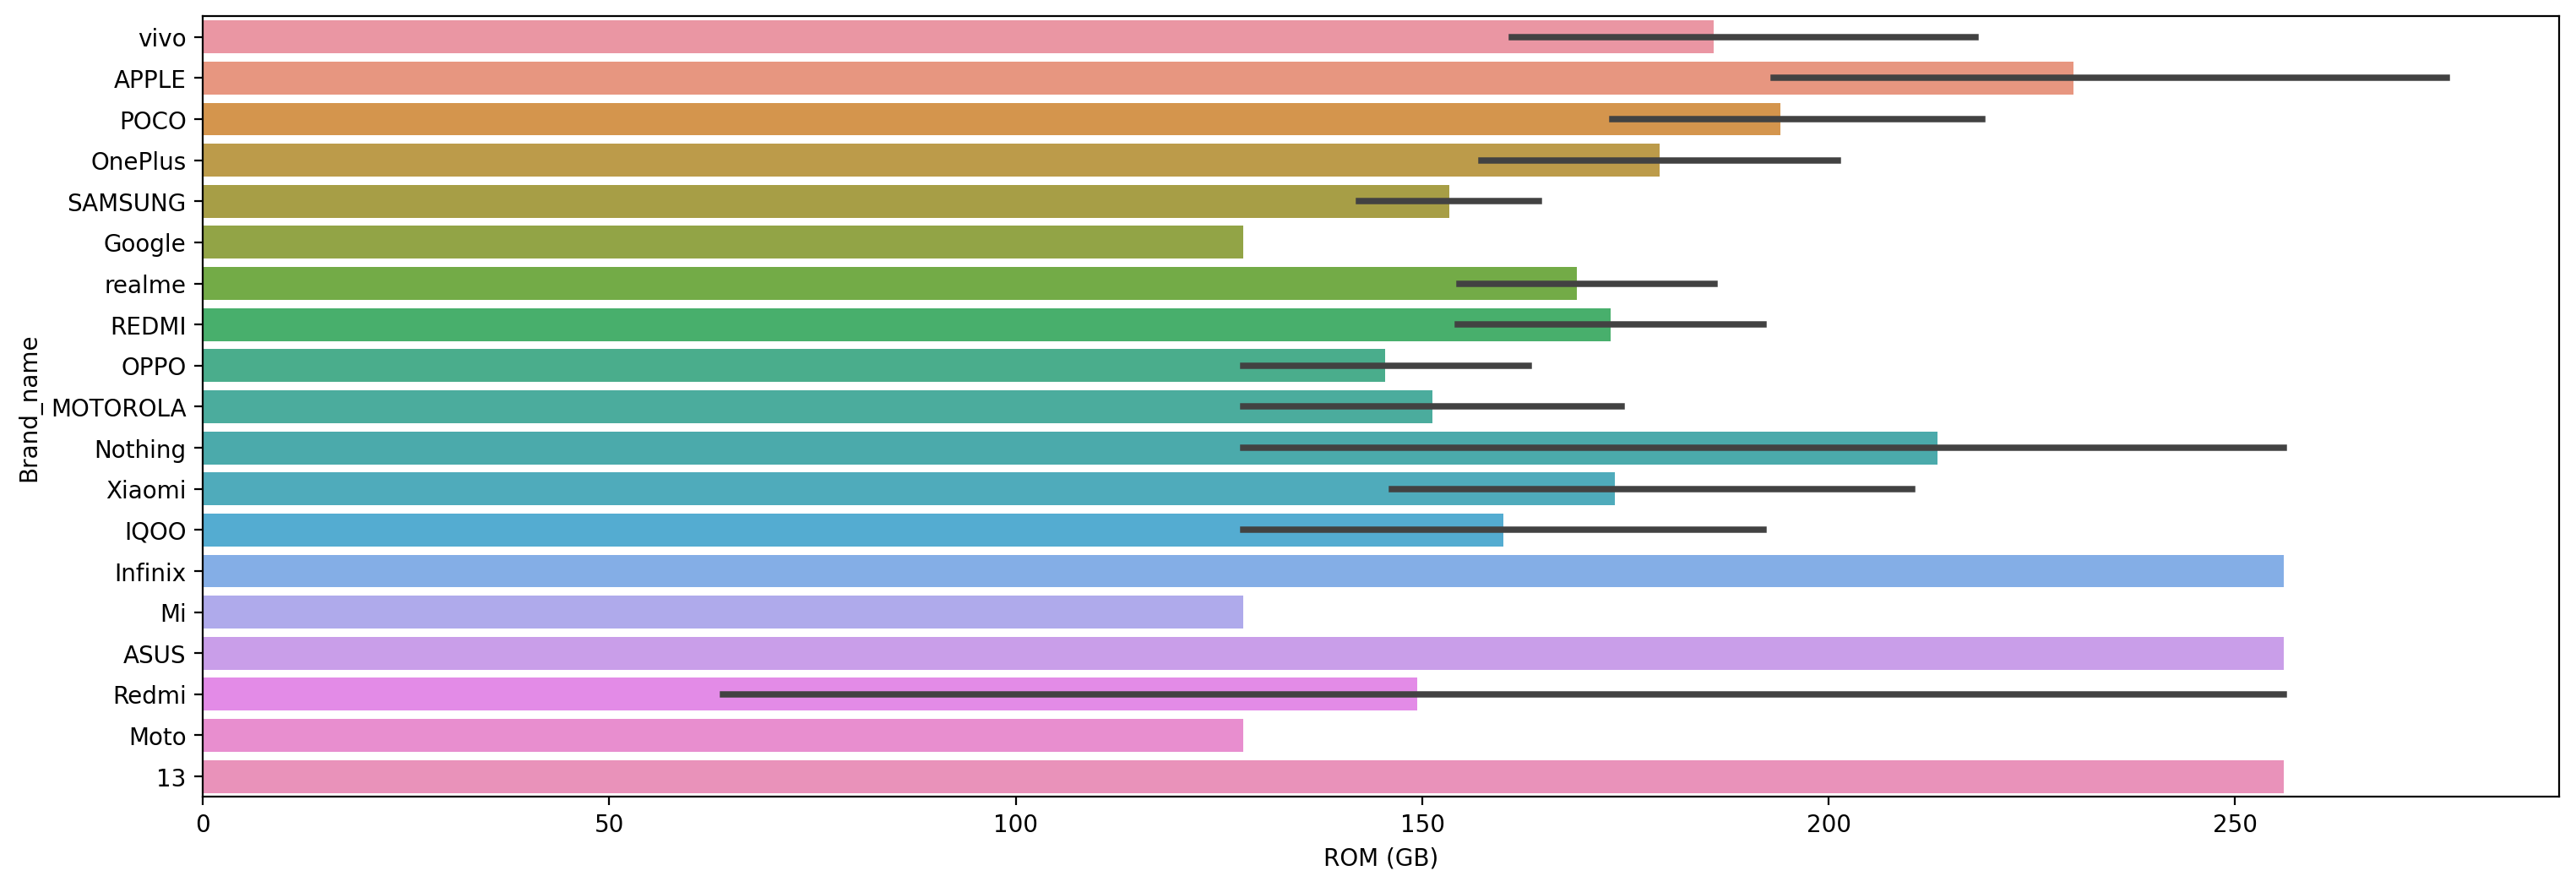

In [168]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('ROM (GB)','Brand_name', data = flipkart_phones)

#### Apple, ASUS, Infinix and 13 Brand phones is having higher ROM size

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Battery (mAh)', ylabel='Brand_name'>

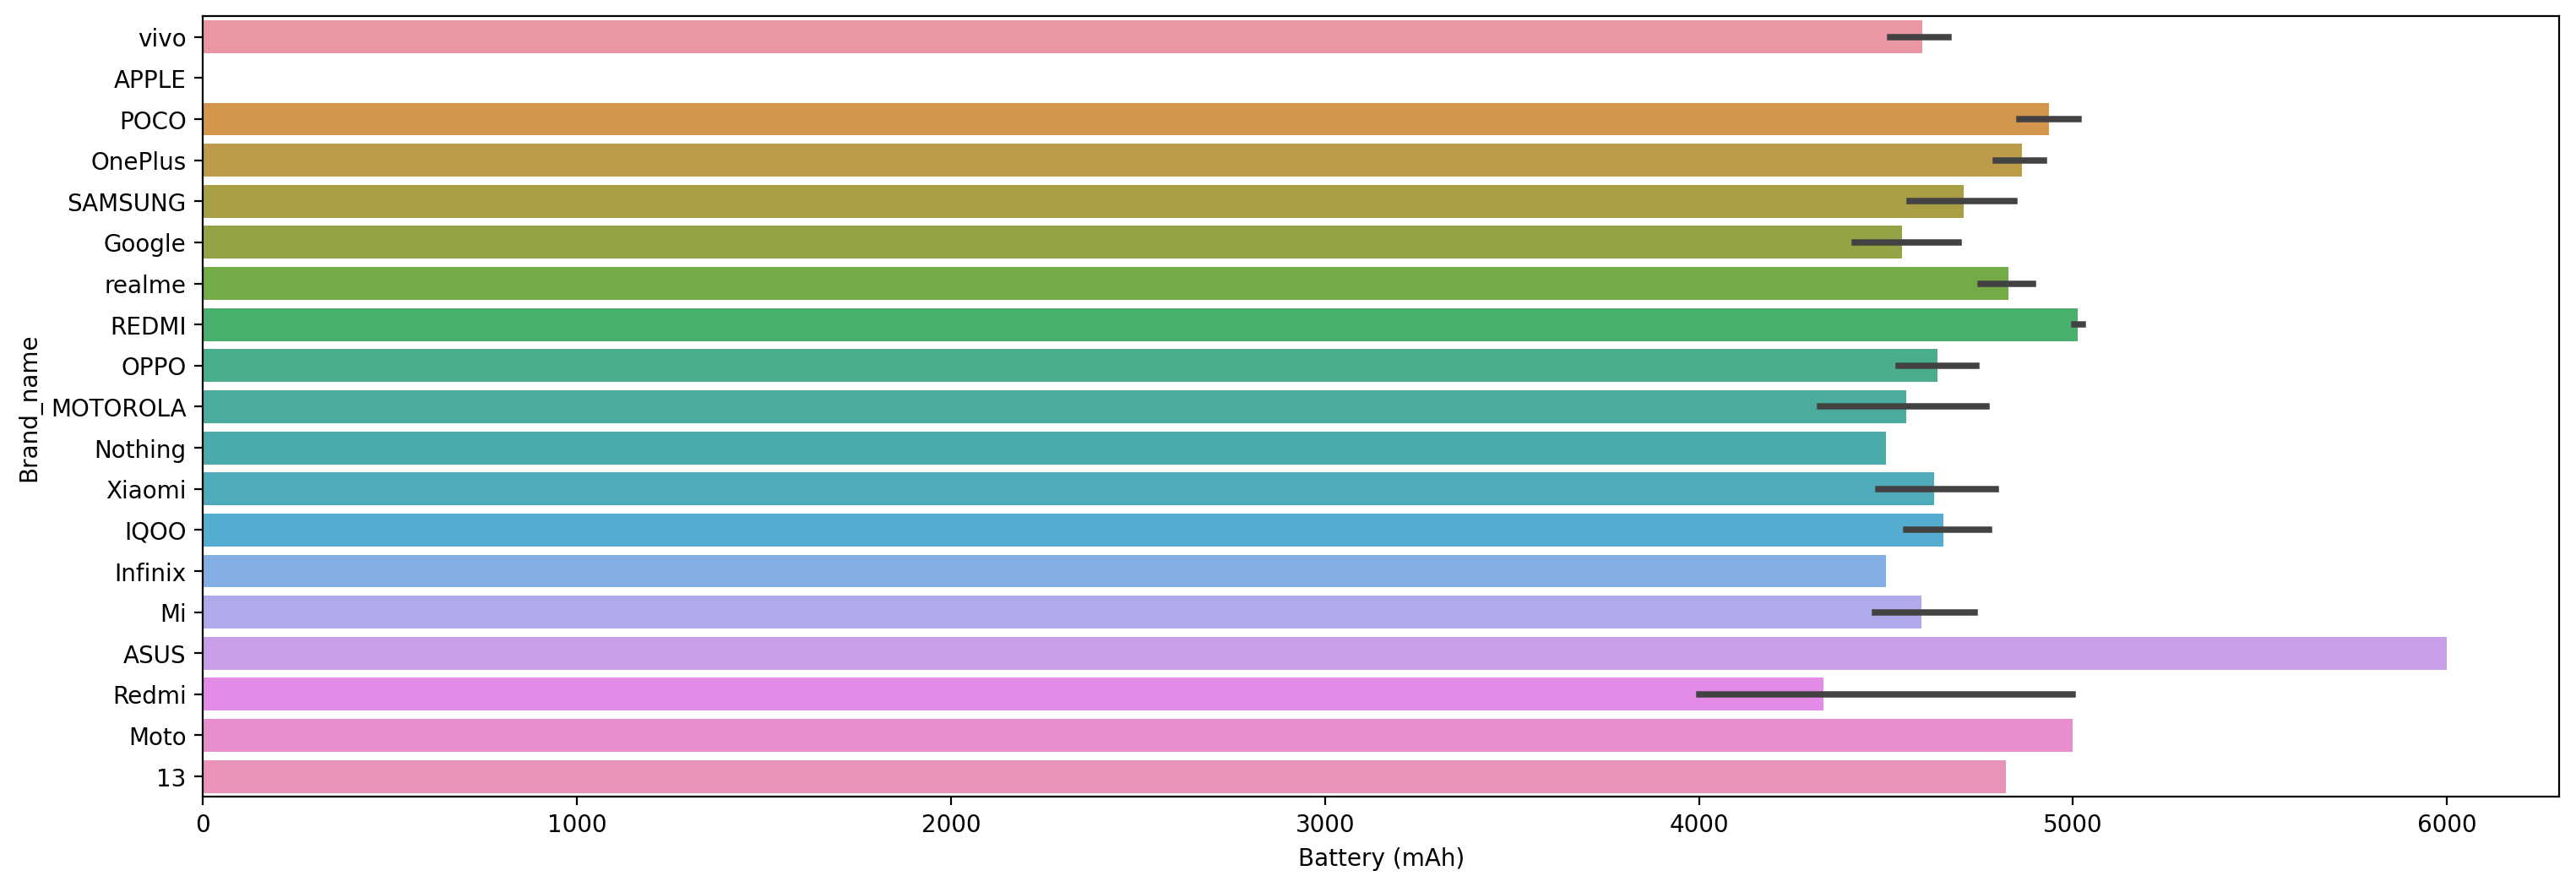

In [169]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('Battery (mAh)','Brand_name', data = flipkart_phones)

#### Asus phone is having higher battery capacity 

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Display (inch)', ylabel='Brand_name'>

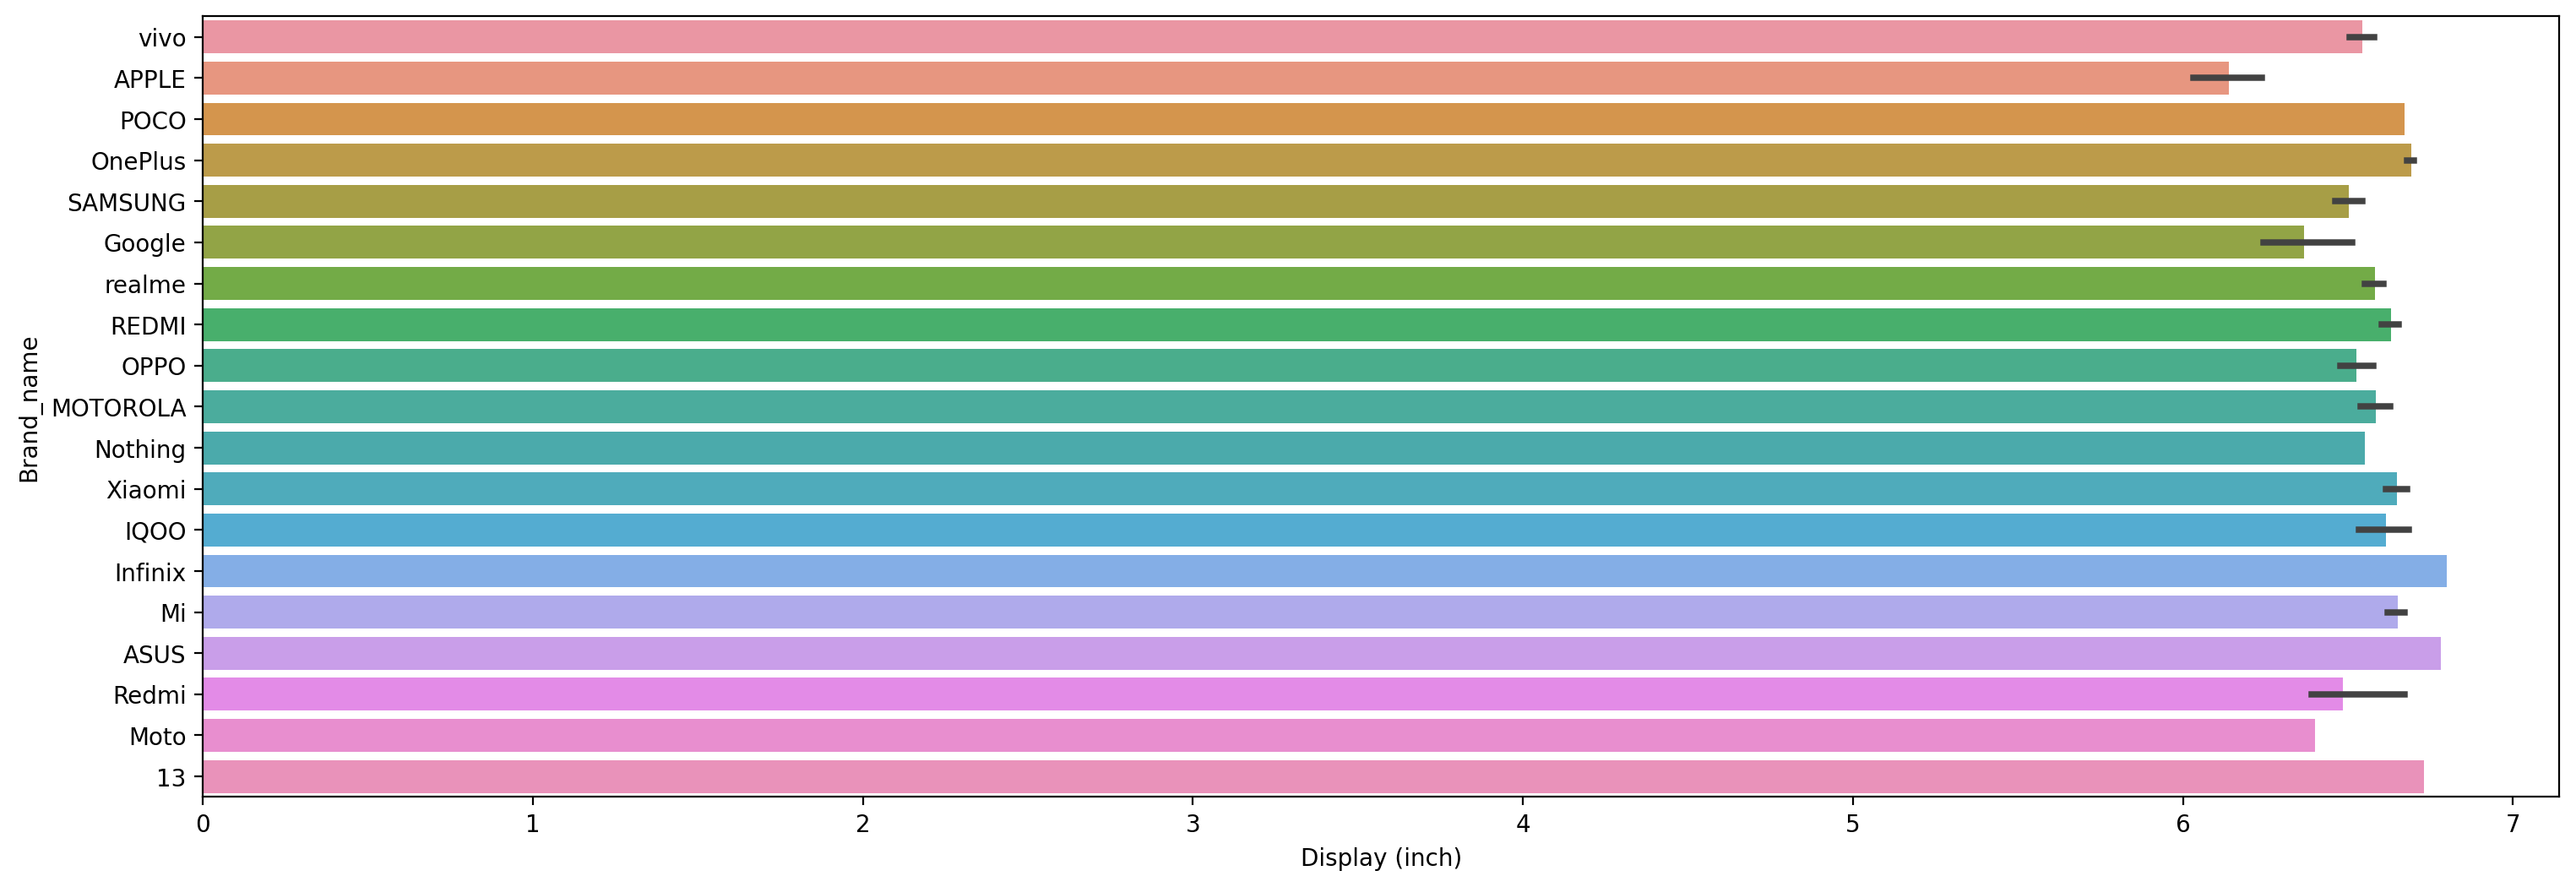

In [178]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('Display (inch)','Brand_name', data = flipkart_phones)

#### Average display size offered by almost all brand is between 6-7 inch

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Rear Camera (MP)', ylabel='Brand_name'>

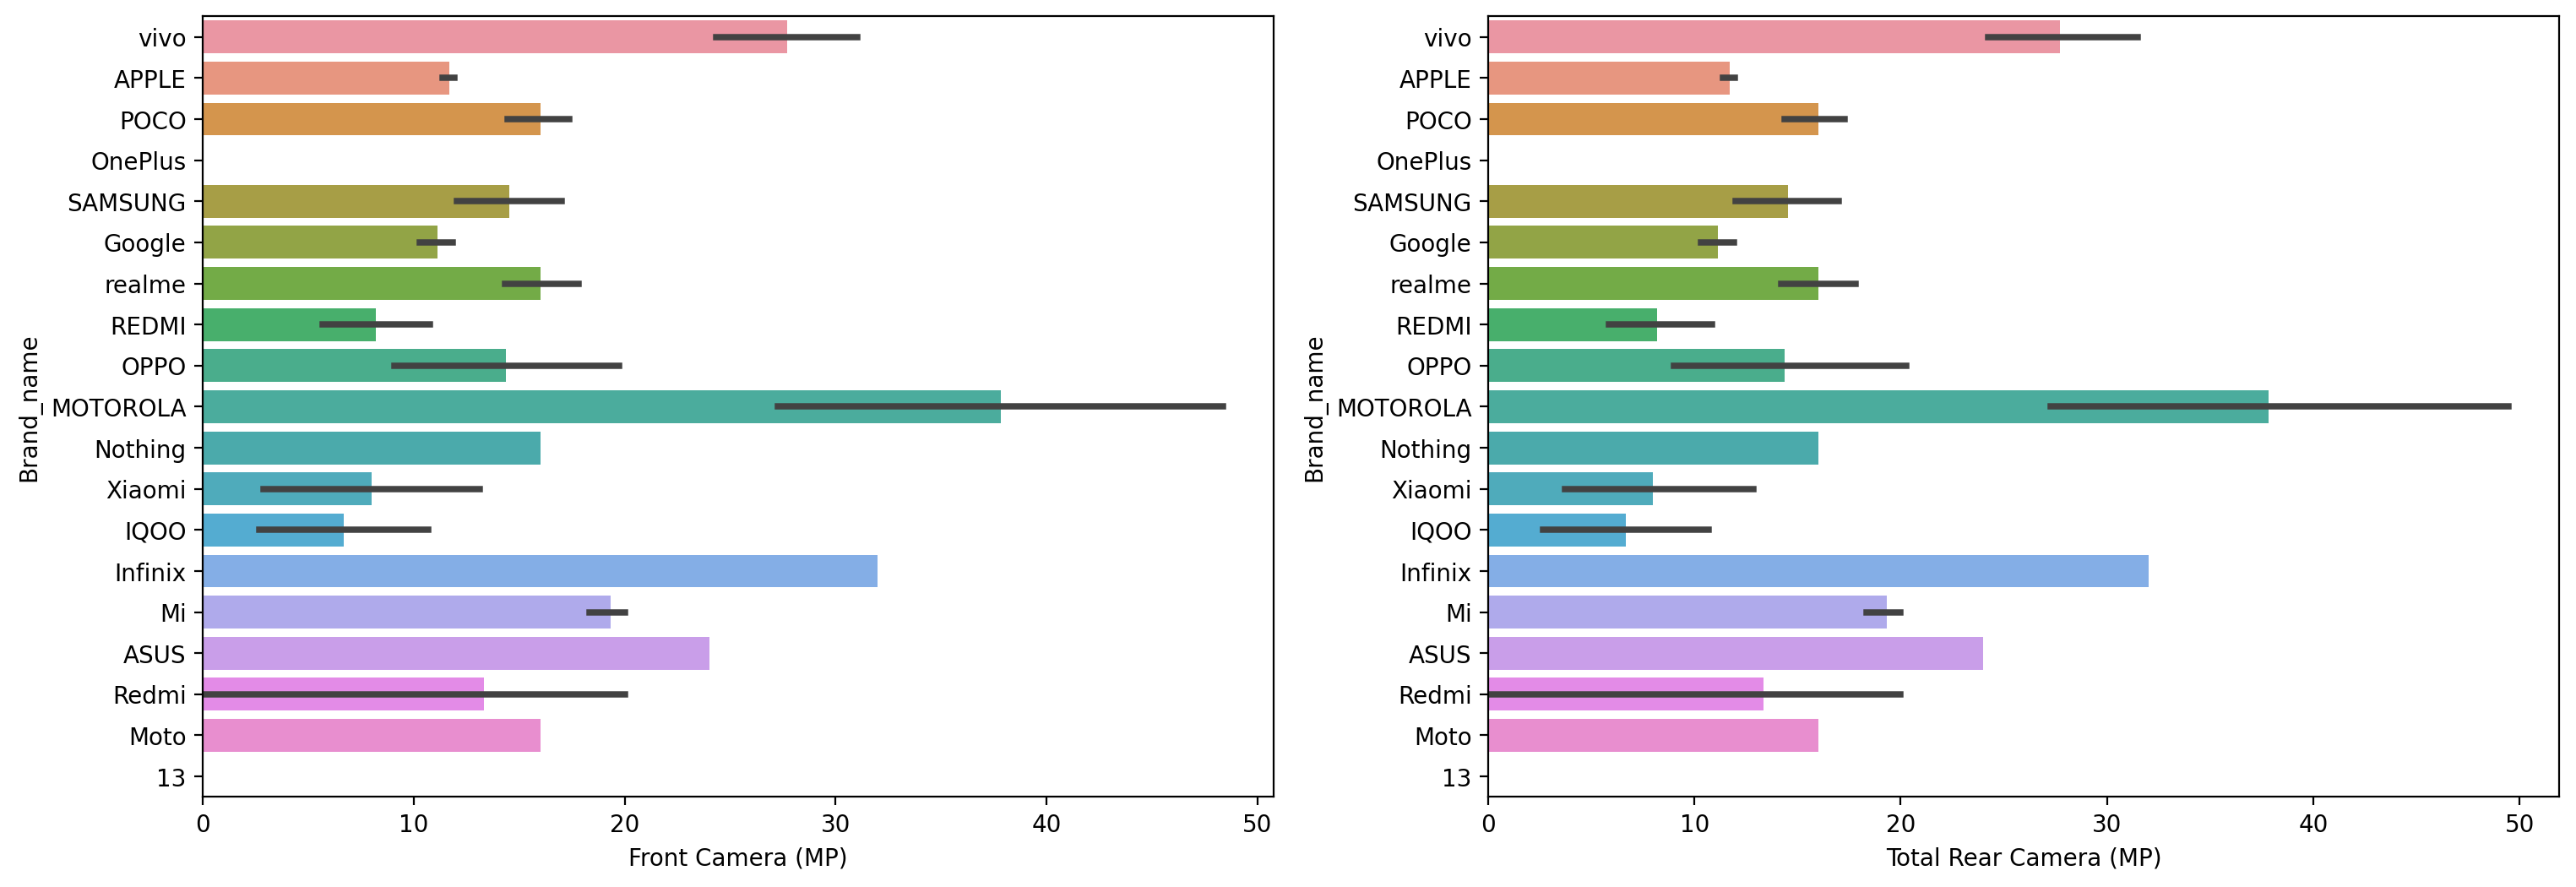

In [182]:
plt.figure(figsize = (18, 6), dpi = 200)
plt.subplot(1,2,1)
sns.barplot('Front Camera (MP)','Brand_name', data = flipkart_phones)
plt.subplot(1,2,2)
sns.barplot('Total Rear Camera (MP)','Brand_name', data = flipkart_phones)

#### Motorola mobile phone is having higher front and rear camera (mega pixels) 

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_reviews', ylabel='Brand_name'>

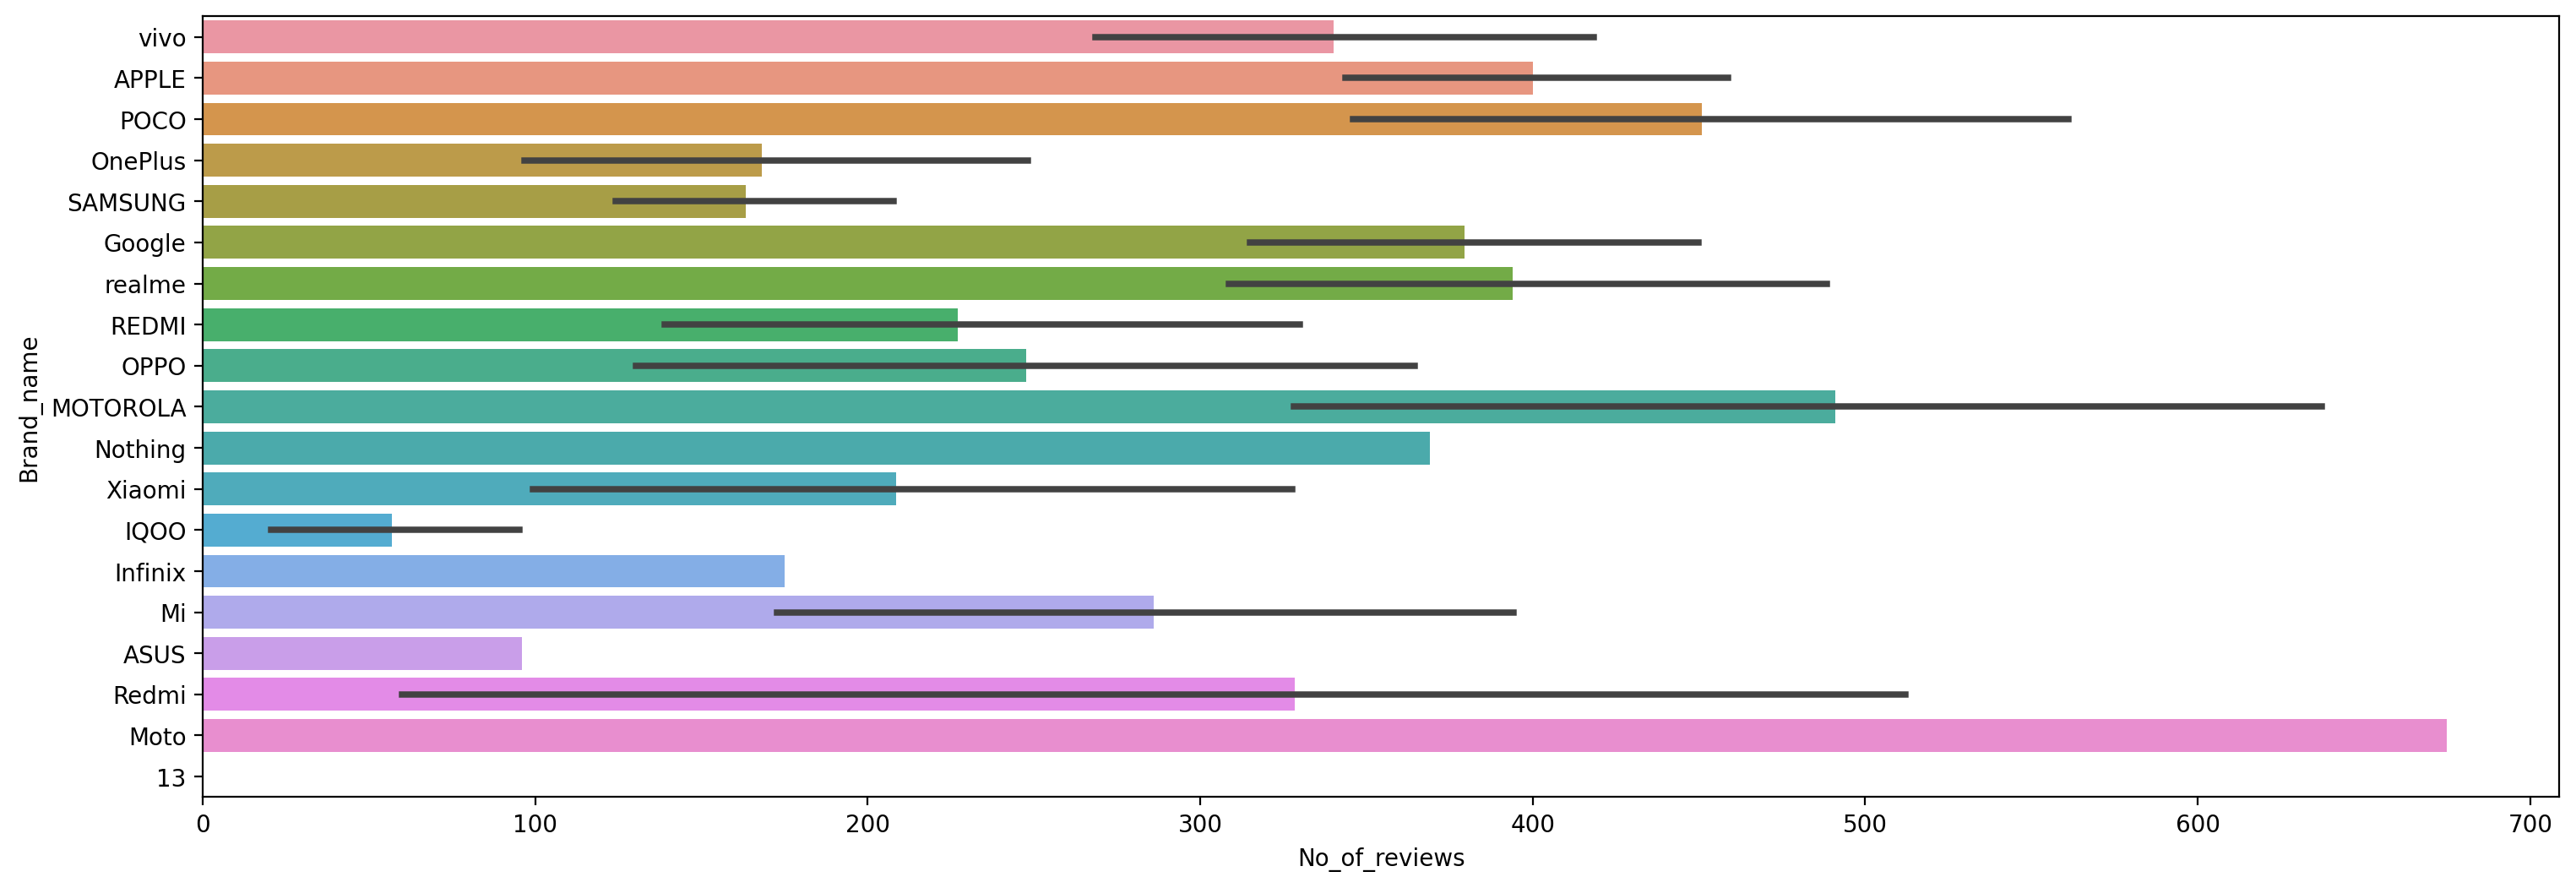

In [184]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('No_of_reviews','Brand_name', data = flipkart_phones)

#### Moto is having higher no of reviews

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_ratings', ylabel='Brand_name'>

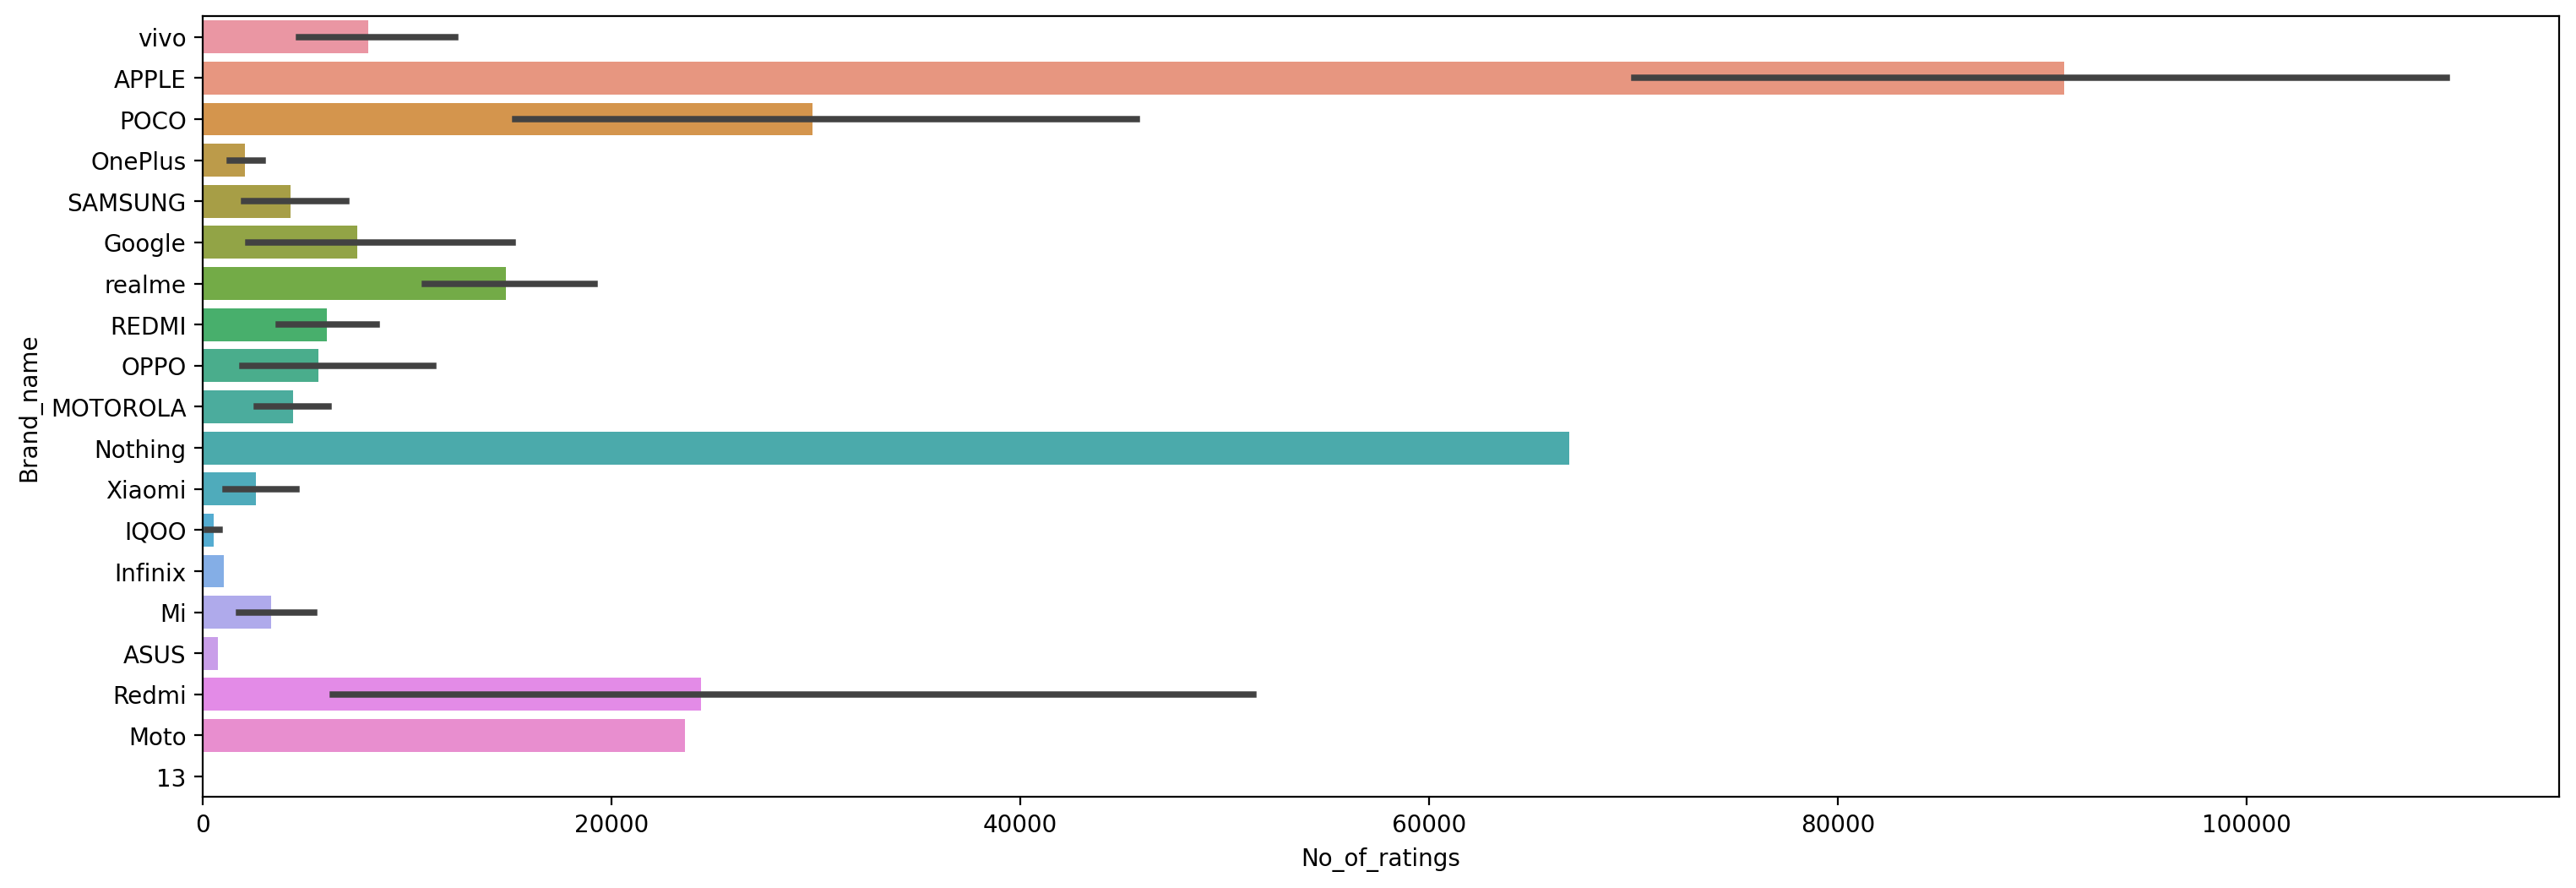

In [5]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('No_of_ratings','Brand_name', data = flipkart_phones)


#### Apple phones is having the highest no of ratings 

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Brand_name'>

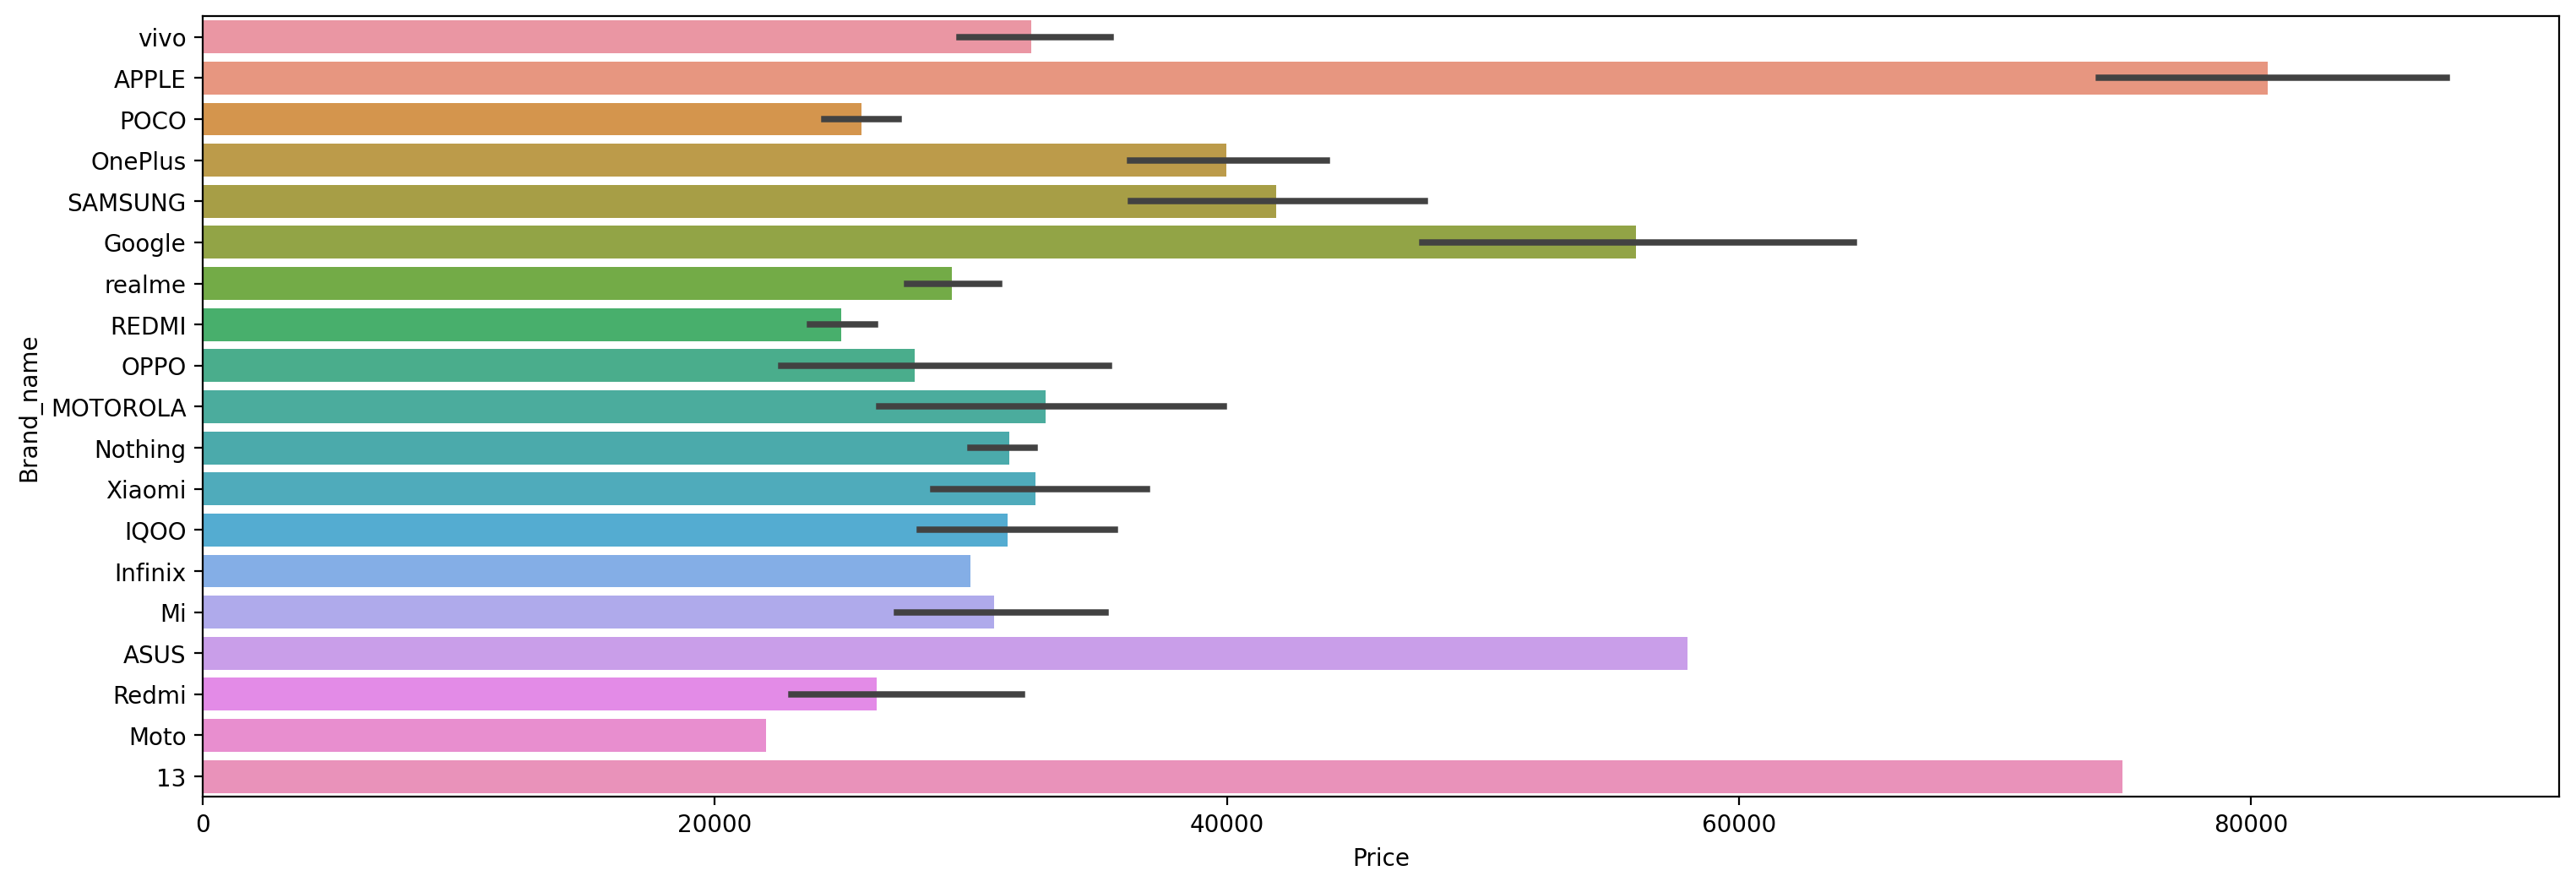

In [6]:
plt.figure(figsize = (18, 6), dpi = 200)
sns.barplot('Price','Brand_name', data = flipkart_phones)

#### Apple phones is having the highest Price

# Summary

#### 13 and Asus is the brand having higher RAM size.
#### Apple, ASUS, Infinix and 13 Brand phones is having higher ROM size.
#### Asus phone is having higher battery capacity.
#### Average display size offered by almost all brand is between 6-7 inch.
#### Motorola mobile phone is having higher front and rear camera (mega pixels) .
#### Moto is having higher no of reviews.
#### Apple phones is having the Price and highest no of ratings.
